In [1]:
import torch
import torchvision
from torchvision import datasets, transforms


In [4]:
train = datasets.MNIST('', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [16]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x,dim=1)
    
net = Net()
print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
X = torch.rand((28,28))
X = X.view(1,28*28)
output = net(X)

In [18]:
output

tensor([[-2.2805, -2.4171, -2.3730, -2.3680, -2.1860, -2.2152, -2.1988, -2.2518,
         -2.4031, -2.3685]], grad_fn=<LogSoftmaxBackward>)

In [21]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)
# optimizer declared

EPOCHS = 3 

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad() #declares zero grad
        output = net(X.view(-1,28*28)) # value passed to Net, returns output
        loss = F.nll_loss(output,y)  #calculates loss using pytorch function against correct value
        loss.backward()   #sends loss backward
        optimizer.step()  #optimizes
    print(loss)    

tensor(0.0300, grad_fn=<NllLossBackward>)
tensor(0.0115, grad_fn=<NllLossBackward>)
tensor(0.0199, grad_fn=<NllLossBackward>)


In [23]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i  in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
            
print(f'Accuracy: {round(correct/total, 3)}')            

Accuracy: 0.976


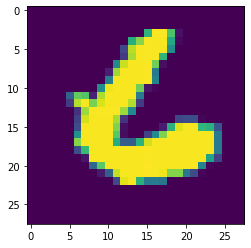

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X[6].view(28,28))
plt.show()

In [28]:
print(torch.argmax(net(X[6].view(-1,784))[0]))

tensor(6)
